In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


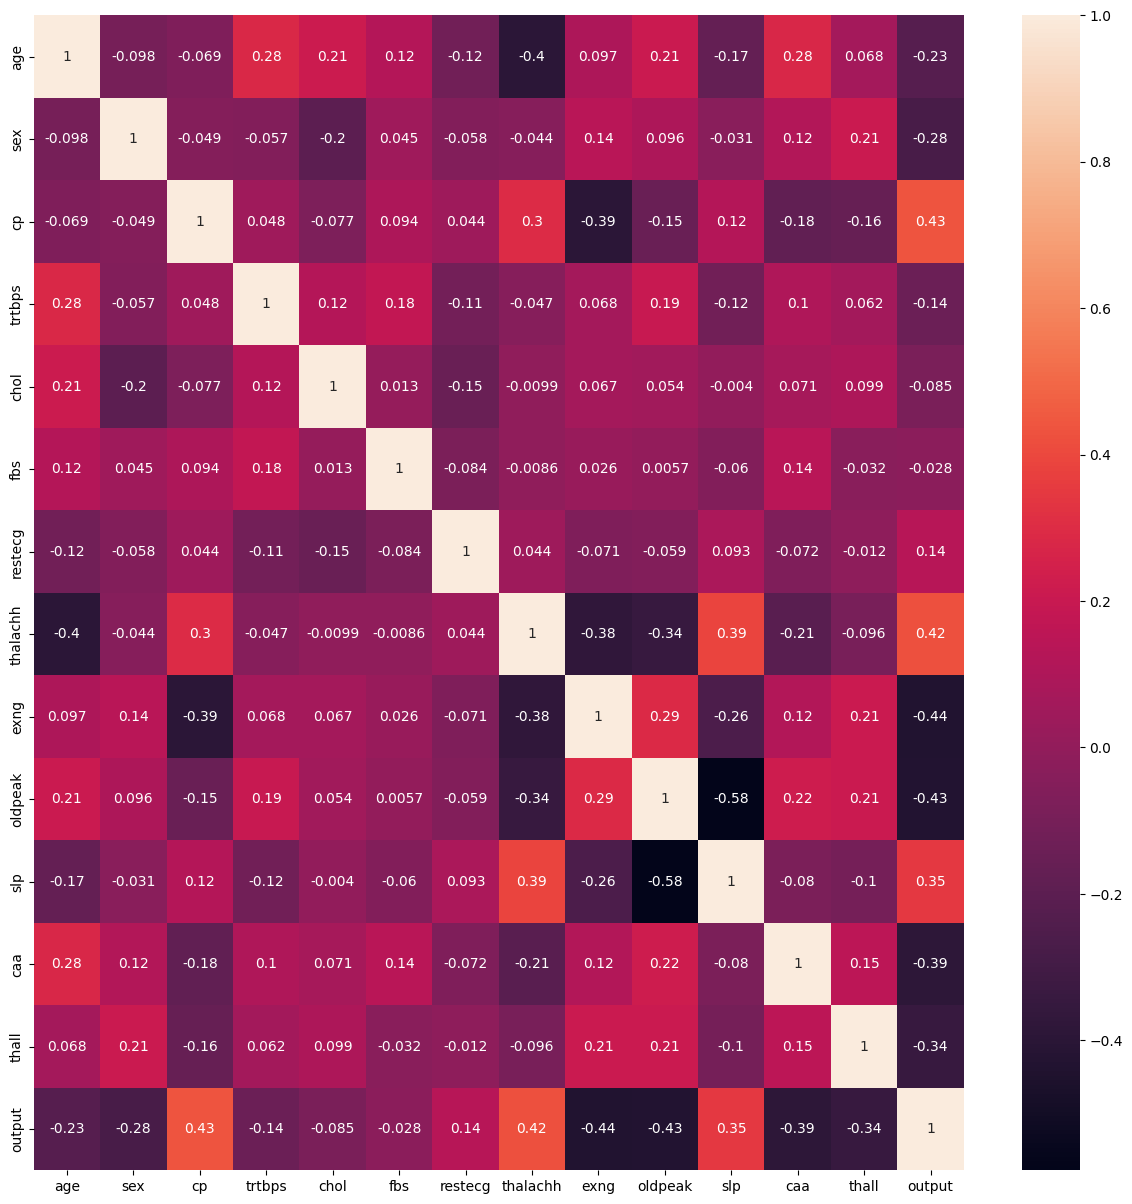

In [5]:
plt.figure(figsize=(15,15))
corr_mx = df.corr(method='pearson')
sns.heatmap(corr_mx, annot=True)
plt.show()

# Model Creation

In [6]:
import sklearn.model_selection as ms

FEATURE = ['cp', 'restecg', 'thalachh',
           'slp', 'fbs', 'chol', 'sex', 'age',
           'oldpeak', 'caa']

TARGET = ['output']

In [7]:
X_train, X_test, y_train, y_test = ms.train_test_split(df[FEATURE], df[TARGET],
                                                       test_size=0.2, random_state=0)

In [8]:
import sklearn.linear_model as lm
import sklearn.metrics as met

reg = lm.LogisticRegression(solver='lbfgs')
reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_preds = reg.predict(X_test)

# Evaluation

In [10]:
confusion_mx = met.confusion_matrix(y_test, y_preds)
tp = confusion_mx[0][0]
fp = confusion_mx[0][1]
fn = confusion_mx[1][0]
tn = confusion_mx[1][1]

confusion_mx

array([[21,  6],
       [ 3, 31]])

In [11]:
acc = reg.score(X_test, y_test)
pres = met.precision_score(y_test, y_preds)
p_sensivity = tp/(tp + fn)
n_sensivity = tn/(tn + fp)

print(f'Accuracy = {acc:.4f}')
print(f'Precision = {pres:.4f}')
print(f'Positive Sensivity = {p_sensivity:.4f}')
print(f'Negative Sensivity = {n_sensivity:.4f}')

Accuracy = 0.8525
Precision = 0.8378
Positive Sensivity = 0.8750
Negative Sensivity = 0.8378
